<a href="https://colab.research.google.com/github/Kalyani123-web-stack/EDA-_Play-store-data/blob/main/Kalyani_updated_play_store.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd

path='/content/drive/MyDrive/CSV/Copy of Play Store Data.csv'
df=pd.read_csv(path)
df.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
df.shape

(10841, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [ ]:
#check null values.null values get True,non-null values get False.
df.isnull()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,False,False,False,False,False,False,False,False,False,False,False,False,False
10837,False,False,False,False,False,False,False,False,False,False,False,False,False
10838,False,False,True,False,False,False,False,False,False,False,False,False,False
10839,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
#count of null values
df.isna().sum()

,0
App,0
Category,0
Rating,1474
Reviews,0
Size,0
Installs,0
Type,1
Price,0
Content Rating,1
Genres,0


In [ ]:
#drop null values
df.dropna(inplace=True)

In [ ]:
#checking null values after deleting null values
df.isna().sum()

,0
App,0
Category,0
Rating,0
Reviews,0
Size,0
Installs,0
Type,0
Price,0
Content Rating,0
Genres,0


In [ ]:
#the keep parameter is set to False, so that only Unique values are taken and the duplicate values are removed from DataFrame.
df.duplicated(keep=False)

,0
0,False
1,False
2,False
3,False
4,False
...,...
10834,False
10836,False
10837,False
10839,False


In [ ]:
#delete columns
df.drop(['Last Updated','Current Ver','Android Ver'],axis=1,inplace=True)

In [ ]:
#check shape after droping columns
df.shape

(9360, 10)

In [ ]:
#list of columns
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Size_measure',
       'Installs', 'Type', 'Price', 'Content Rating', 'Genres',
       'Size_with_measure'],
      dtype='object')

In [ ]:
#convert Reviews to numeric
df['Reviews']=df['Reviews'].astype(str)
df['Reviews']=df['Reviews'].apply(lambda x:x.replace('M','.000000'))
df['Reviews']=pd.to_numeric(df['Reviews'].str.replace(',',''),errors='coerce')
print(df['Reviews'])

0           159
1           967
2         87510
3        215644
4           967
          ...  
10834         7
10836        38
10837         4
10839       114
10840    398307
Name: Reviews, Length: 9360, dtype: int64


In [ ]:
df['Reviews'].head(150)

,Reviews
0,159
1,967
2,87510
3,215644
4,967
...,...
153,90468
154,860
155,363934
156,967


(Avoid Special Regex Handling: Some characters like +, ., ?, or * have special meanings in regex. If you want to replace these as plain text characters,
setting **regex=False** ensures that they aren't treated as regex patterns but as normal characters.)

In [ ]:
#convert size to numeric

import pandas as pd
df['original_size']=df['Size']
df['Size']=df['Size'].astype(str)                                   #convert size into string
df['Size']=df['Size'].str.replace('+','',regex=False)               #remove + sign
df['Size']=df['Size'].str.replace('M','',regex=True)                # remove M
df['Size']=df['Size'].str.replace('k','',regex=True)                #remove k
df['Size']=df['Size'].str.replace('Varies with device','NaN',regex=False)
df['Size']=df['Size'].str.replace('1,000+','1000',regex=True)
df['Size']=pd.to_numeric(df['Size'],errors='coerce')
print(df['Size'])

0        19.0
1        14.0
2         8.7
3        25.0
4         2.8
         ... 
10834     2.6
10836    53.0
10837     3.6
10839     NaN
10840    19.0
Name: Size, Length: 9360, dtype: float64


In [ ]:
#insert Size_measure column

df['Size_measure'] = df['original_size'].apply(lambda x: 'M' if 'M'in x else('k' if 'k' in x else 'other'))

df.insert(df.columns.get_loc('Size') + 1, 'Size_measure', df.pop('Size_measure'))
print(df)



                                                     App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10834                                      FR Calculator               FAMILY   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rating  Reviews  Siz

In [ ]:
df.head(150)

,App,Category,Rating,Reviews,Size,Size_measure,Installs,Type,Price,Content Rating,Genres,original_size
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,M,"10,000+",Free,0,Everyone,Art & Design,19M
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,14M
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,M,"5,000,000+",Free,0,Everyone,Art & Design,8.7M
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,M,"50,000,000+",Free,0,Teen,Art & Design,25M
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,M,"100,000+",Free,0,Everyone,Art & Design;Creativity,2.8M
...,...,...,...,...,...,...,...,...,...,...,...,...
153,AlReader -any text book reader,BOOKS_AND_REFERENCE,4.6,90468,5.9,M,"5,000,000+",Free,0,Everyone,Books & Reference,5.9M
154,Offline English Dictionary,BOOKS_AND_REFERENCE,4.2,860,13.0,M,"100,000+",Free,0,Everyone,Books & Reference,13M
155,Oxford Dictionary of English : Free,BOOKS_AND_REFERENCE,4.1,363934,7.1,M,"10,000,000+",Free,0,Everyone,Books & Reference,7.1M
156,Offline: English to Tagalog Dictionary,BOOKS_AND_REFERENCE,4.7,967,6.7,M,"500,000+",Free,0,Everyone,Books & Reference,6.7M


In [ ]:
df.drop(['original_size'],axis=1,inplace=True)

In [ ]:
df.head()

,App,Category,Rating,Reviews,Size,Size_measure,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,M,"10,000+",Free,0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,M,"5,000,000+",Free,0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,M,"50,000,000+",Free,0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,M,"100,000+",Free,0,Everyone,Art & Design;Creativity


In [ ]:
#convert Installs to numeric

df['Installs']=df['Installs'].astype(str)
df['Installs']=df['Installs'].str.replace('+','',regex=False)  #remove + sign
df['Installs']=df['Installs'].str.replace(',','',regex=True)   #remove , sign
df['Installs']=pd.to_numeric(df['Installs'],errors='coerce')



In [ ]:
#check Install column works properly after some operation
df.head()

,App,Category,Rating,Reviews,Size,Size_measure,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,M,10000,Free,0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,M,500000,Free,0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,M,5000000,Free,0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,M,50000000,Free,0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,M,100000,Free,0,Everyone,Art & Design;Creativity


In [ ]:
#convert Price to numeric

df['Price']=df['Price'].astype(str)
df['Price']=df['Price'].str.replace('$','',regex=False)    # removes $ sign
df['Price']=df['Price'].str.replace('Everyone','0',regex=False) # replace Everyone with 0
df['Price']=pd.to_numeric(df['Price'],errors='coerce')
print(df['Price'])

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
10834    0.0
10836    0.0
10837    0.0
10839    0.0
10840    0.0
Name: Price, Length: 9360, dtype: float64


In [ ]:
df.head(100)

,App,Category,Rating,Reviews,Size,Size_measure,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,M,10000,Free,0.0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,M,500000,Free,0.0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,M,5000000,Free,0.0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,M,50000000,Free,0.0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,M,100000,Free,0.0,Everyone,Art & Design;Creativity
...,...,...,...,...,...,...,...,...,...,...,...
97,Gas Station,AUTO_AND_VEHICLES,4.0,1288,4.5,M,100000,Free,0.0,Everyone,Auto & Vehicles
98,Hush - Beauty for Everyone,BEAUTY,4.7,18900,17.0,M,500000,Free,0.0,Everyone,Beauty
99,"ipsy: Makeup, Beauty, and Tips",BEAUTY,4.9,49790,14.0,M,1000000,Free,0.0,Everyone,Beauty
100,Natural recipes for your beauty,BEAUTY,4.7,1150,9.8,M,100000,Free,0.0,Everyone,Beauty


In [ ]:
#check Price column working or not after some operations
#Filter rows where Price is 1.00
df.loc[df['Price']==1.00]

,App,Category,Rating,Reviews,Size,Size_measure,Installs,Type,Price,Content Rating,Genres
9026,PORTABLE SOCCER DX,SPORTS,4.4,552,1.6,M,5000,Paid,1.0,Everyone,Sports
10460,Wi-Fi Rabbit Unlock Key,TOOLS,4.5,142,26.0,k,5000,Paid,1.0,Everyone,Tools


In [ ]:
#categorical analysis

import numpy as np
df['Installs']=df['Installs'].astype(str)
df['Installs']=df['Installs'].str.replace('Free','0')  #Replace 'Free' with '0'
df['Installs']=df['Installs'].str.replace('[+,]','',regex=True) #Remove any '+' and ',' characters
df['Installs']=pd.to_numeric(df['Installs'],errors='coerce') #Convert the 'Installs' column to numeric values
df['Installs']=df['Installs'].fillna(0).astype(int)    #Find any NaN values



In [ ]:
df['Reviews']=pd.to_numeric(df['Reviews'],errors='coerce')
df['Reviews']=df['Reviews'].fillna(0).astype(int)

In [ ]:
#Remove rows with invalid categories like '1.9'
df=df[df['Category']!='1.9']

In [ ]:

category_analysis=df.groupby('Category').agg({'Rating':'mean','Reviews':'sum','Installs':'sum','Price':'sum'}).sort_values(by='Installs',ascending=False)
print(category_analysis)

                       Rating     Reviews     Installs    Price
Category                                                       
GAME                 4.286326  1585419577  35085862717   280.36
COMMUNICATION        4.158537   815461799  32647241530    56.69
PRODUCTIVITY         4.211396   114116717  14176070180    70.92
SOCIAL               4.255598   621241091  14069841475     1.98
TOOLS                4.047203   273180158  11450224500   207.90
FAMILY               4.192383   410222902  10257651590  2295.75
PHOTOGRAPHY          4.192114   213516607  10088243130    88.24
NEWS_AND_MAGAZINES   4.132189    54399899   7496210650     3.98
TRAVEL_AND_LOCAL     4.109292    62617772   6868859300    37.49
VIDEO_PLAYERS        4.063750   110379692   6221897200    10.46
SHOPPING             4.259664   115041033   3247831540     5.48
ENTERTAINMENT        4.126174    59178154   2869160000     7.98
PERSONALIZATION      4.335256    89345396   2325341930   126.27
BOOKS_AND_REFERENCE  4.346067    2195866

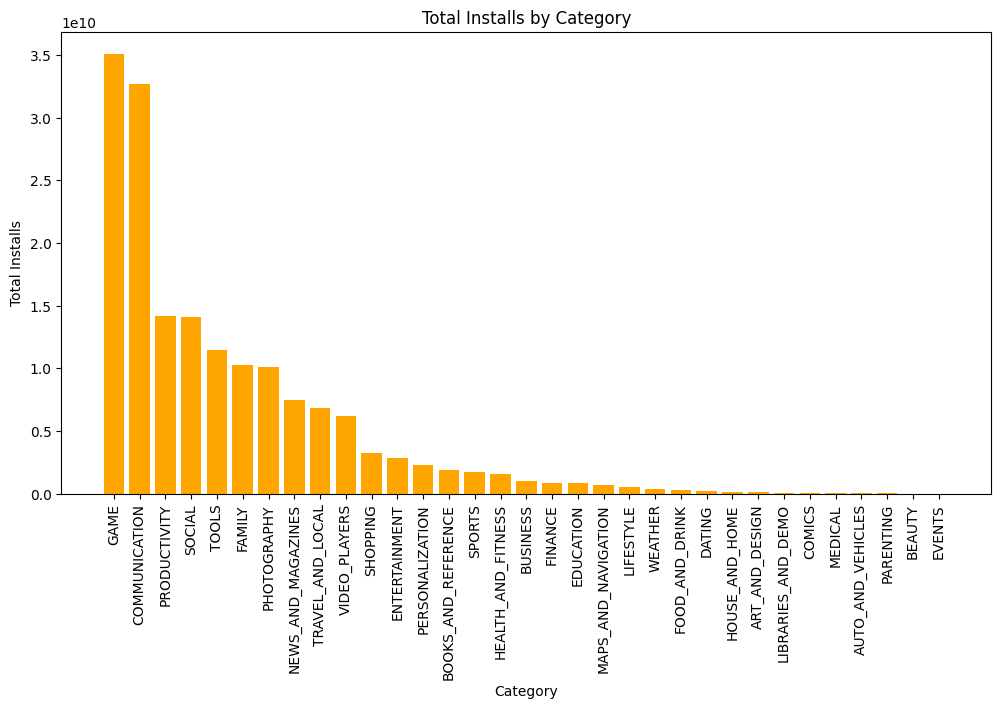

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
plt.bar(category_analysis.index,category_analysis['Installs'],color='orange')
plt.title('Total Installs by Category')
plt.xlabel('Category')
plt.xticks(rotation=90)
plt.ylabel('Total Installs')

plt.show()

*Obj 1:*

*   **Game & Communication** categories have highest number of installs,indicates that strong use of internet in gaming & communication.
*   **Productivity,Social & Tools** have significant installs as per demanding of productivity & social application.
* Categories like **Beauty,Events & Auto_And_Vehicles** appears at the bottom indicates that they have fewer installs as compare to others.



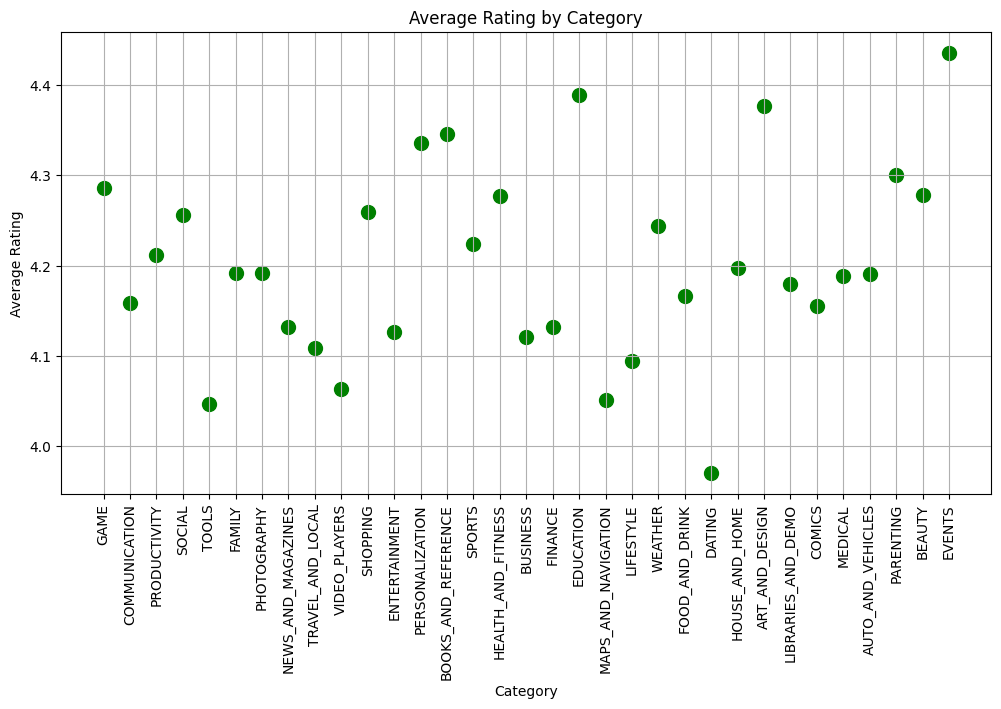

In [ ]:
plt.figure(figsize=(12,6))
plt.scatter(category_analysis.index,category_analysis['Rating'],color='green',s=100)
plt.title('Average Rating by Category')
plt.xlabel('Category')
plt.xticks(rotation=90)
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()

*Obj 2*:The average rating of categories lies between 4.0-4.4.

1.Top category:
*   **Events** has highest amount of average rating above 4.4.It indicates that users are interested in such category.
*   Other high performing categories are **Education,Books_And_Reference &** **Art_And_Design** with rating around 4.4.

2.Middle Category:

*   **Game,Social,Shopping,Health_And_Fitness & Parenting** are middle in range upto 4.3.

3.Lower Category:

*  **Dating** category has lowest rating lower than 4.0.






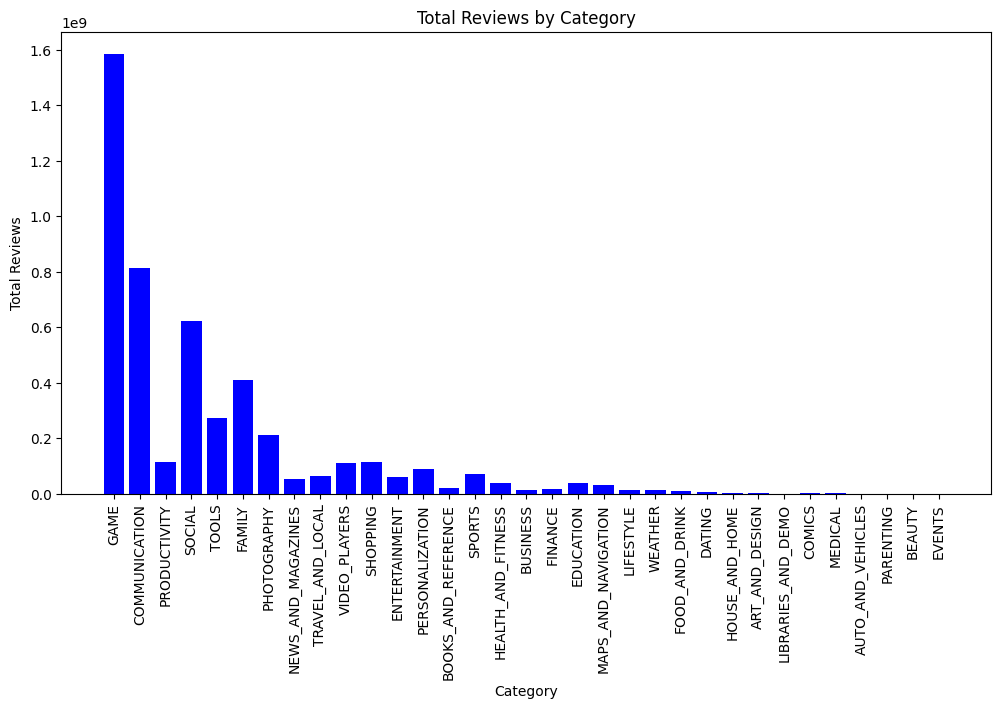

In [ ]:
plt.figure(figsize=(12,6))
plt.bar(category_analysis.index,category_analysis['Reviews'],color='blue')
plt.title('Total Reviews by Category')
plt.xlabel('Category')
plt.xticks(rotation=90)
plt.ylabel('Total Reviews')
plt.show()

*Obj 3*:The highest value of reviews reaches upto 1.6 billion.

*  **Game** category has the highest number of total reviews exceeds **1.6** **billion** reviews,indicates that people are widely used the game application.
*  **Communication** is the next category which have higher number of reviews around **1 billion** reviews but lower than game.
* Categories like **Productivity,Social,Tools,Family & Photography** have moderate number of reviews ranging between **0.2-0.6 billion**.
* Many categories like **Shopping,Sports,Business,Finance** ,etc..have fewer reviews.
* **Events & Beauty** categories have least reviews nearby 0.0.







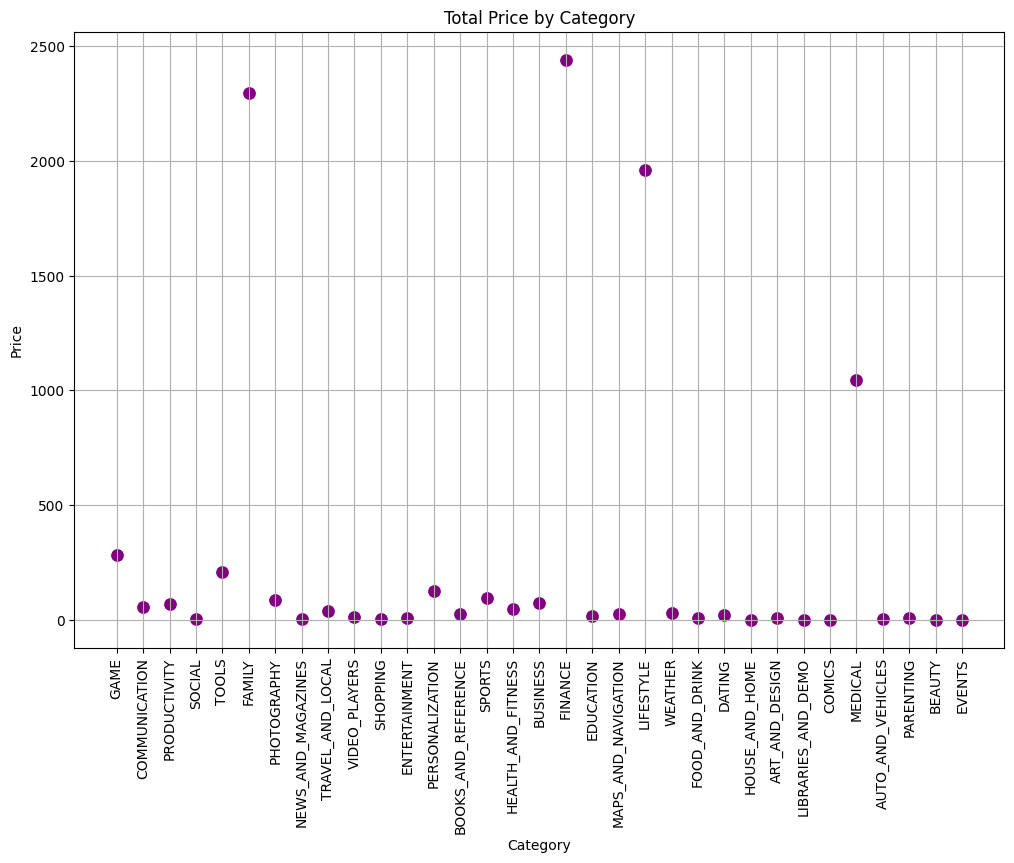

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=category_analysis.index,y=category_analysis['Price'],color='purple',s=100)
plt.title('Total Price by Category')
plt.xlabel('Category')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

*Obj 4:*


*   Categories like **Family,Finance** have higher total prices around 2500.
*   **Lifestyle,Medical** category has high price nearby 2000 as compare to Family.
* Categories like **Game,Tools,Photography** have fewer varied price levels.
*Many categories like **Shopping,Events,Beaut**y,etc.have very least prices close to 0.



In [ ]:
#size analysis

df['Size_with_measure']=df['Size'].astype(str)+df['Size_measure']
size_with_measure=df.groupby('Category')['Size_with_measure'].apply(lambda x:' ,'.join(x)).reset_index()
print(size_with_measure)


               Category                                  Size_with_measure
0        ART_AND_DESIGN  19.0M ,14.0M ,8.7M ,25.0M ,2.8M ,5.6M ,19.0M ,...
1     AUTO_AND_VEHICLES  25.0M ,56.0M ,57.0M ,nanother ,35.0M ,33.0M ,3...
2                BEAUTY  17.0M ,14.0M ,9.8M ,21.0M ,nanother ,52.0M ,14...
3   BOOKS_AND_REFERENCE  nanother ,4.9M ,9.5M ,nanother ,nanother ,nano...
4              BUSINESS  nanother ,nanother ,nanother ,29.0M ,nanother ...
5                COMICS  nanother ,4.9M ,27.0M ,32.0M ,12.0M ,15.0M ,11...
6         COMMUNICATION  nanother ,nanother ,17.0M ,nanother ,nanother ...
7                DATING  nanother ,6.2M ,17.0M ,nanother ,15.0M ,nanoth...
8             EDUCATION  nanother ,18.0M ,18.0M ,21.0M ,3.3M ,39.0M ,3....
9         ENTERTAINMENT  nanother ,4.5M ,nanother ,11.0M ,nanother ,4.6...
10               EVENTS  9.5M ,36.0M ,6.3M ,5.9M ,nanother ,12.0M ,2.8M...
11               FAMILY  nanother ,20.0M ,67.0M ,19.0M ,51.0M ,22.0M ,4...
12              FINANCE  

In [ ]:
filter_df=df[df['Size_measure'].isin(['M','k'])]

In [ ]:

size_distribution=filter_df.groupby(['Category','Size_measure']).size().unstack(fill_value=0)
print(size_distribution)


Size_measure            M   k
Category                     
ART_AND_DESIGN         58   0
AUTO_AND_VEHICLES      62   1
BEAUTY                 37   0
BOOKS_AND_REFERENCE   141   3
BUSINESS              238   8
COMICS                 47   2
COMMUNICATION         186  25
DATING                173   0
EDUCATION             108   2
ENTERTAINMENT          90   0
EVENTS                 37   1
FAMILY               1594  22
FINANCE               260   6
FOOD_AND_DRINK         84   0
GAME                  971   3
HEALTH_AND_FITNESS    220   3
HOUSE_AND_HOME         56   0
LIBRARIES_AND_DEMO     34  27
LIFESTYLE             272   8
MAPS_AND_NAVIGATION    93   2
MEDICAL               310  14
NEWS_AND_MAGAZINES    167   2
PARENTING              44   0
PERSONALIZATION       254  24
PHOTOGRAPHY           234   2
PRODUCTIVITY          218  17
SHOPPING              173   6
SOCIAL                175   2
SPORTS                246   1
TOOLS                 563  70
TRAVEL_AND_LOCAL      159   1
VIDEO_PLAY

<Figure size 1200x800 with 0 Axes>

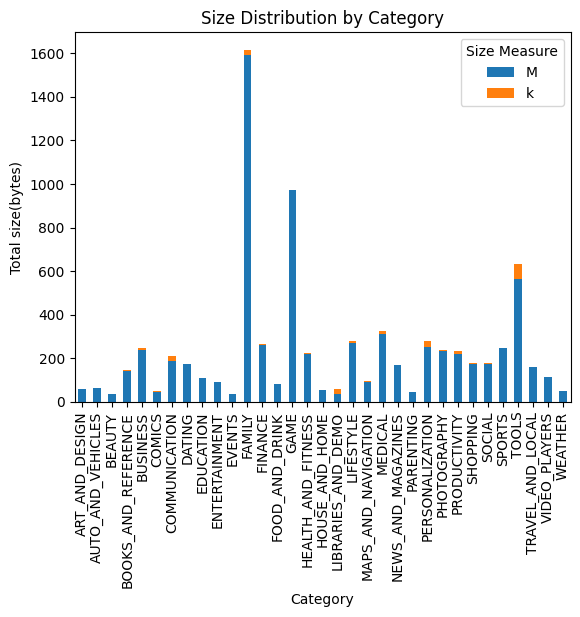

In [ ]:
plt.figure(figsize=(12,8))
size_distribution.plot(kind='bar',stacked=True)
plt.title('Size Distribution by Category')
plt.xlabel('Category')
plt.xticks(rotation=90)
plt.ylabel('Total size(bytes)')
plt.legend(title='Size Measure',labels=['M','k'])
plt.show()

*Obj 5*:M size more preferred as compare to k.


*   **Family** app is the highest category,occupies nearby **1600 MB** size,indicates that it has wide applications.
*  **Game** is second app after Family,which have large size with 1000 M.
* **Tools,Medical** have moderate size within range 400-600 M.
* Categories like **Beauty,Events,Weather** have least size nearby 50M.
* In kilobytes,**Tools** is the highest category occupied with size 70k.




In [ ]:
# Analysis by Type

type_analysis=df.groupby('Type').agg({'Rating':'mean','Installs':'sum','Price':'mean'})
print(type_analysis)

        Rating      Installs      Price
Type                                   
Free  4.186288  167553000356   0.000000
Paid  4.266822      72891582  13.949721


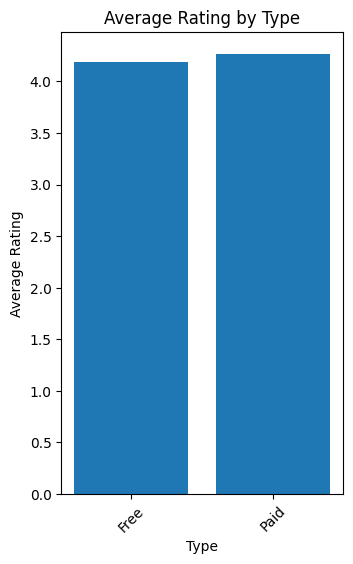

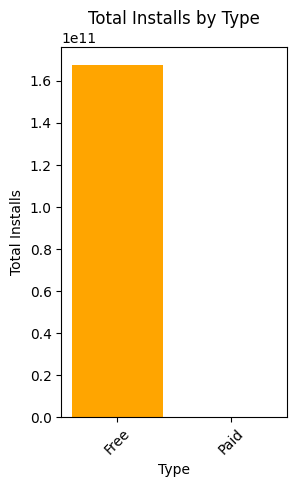

In [ ]:
plt.figure(figsize=(8,6))
plt.subplot(1,2,1)                       # 1 row, 2 columns, first subplot
plt.bar(type_analysis.index,type_analysis['Rating'])
plt.title('Average Rating by Type')
plt.xlabel('Type')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

plt.subplot(1,2,2)                       # 1 row, 2 columns, second subplot
plt.bar(type_analysis.index,type_analysis['Installs'],color='orange')
plt.title('Total Installs by Type')
plt.xlabel('Type')
plt.ylabel('Total Installs')
plt.xticks(rotation=45)
plt.show()

*Obj 6*:Type analysis by Rating:
There is slight difference between Paid & Free type service.


*   The **Paid** type has more rating **exceeds 4.0** as compare to Free type.
*   The **Free **type has rating around 4.0.

*Obj 7* :Type analysis by Installs

*   The **Free** type installs in large amount **exceeds with 160 billion**.






In [ ]:
#Analysis by Content Rating

content_group=df.groupby('Content Rating').agg({'Rating':'mean','Installs':'sum','Reviews':'sum'})
print(content_group)

                   Rating      Installs     Reviews
Content Rating                                     
Adults only 18+  4.300000       2000000       81348
Everyone         4.186472  114149605188  2801798681
Everyone 10+     4.257179   13233755210   683996953
Mature 17+       4.123427    5524354930   197165783
Teen             4.233487   34716126610  1131522010
Unrated          4.100000         50000        1186


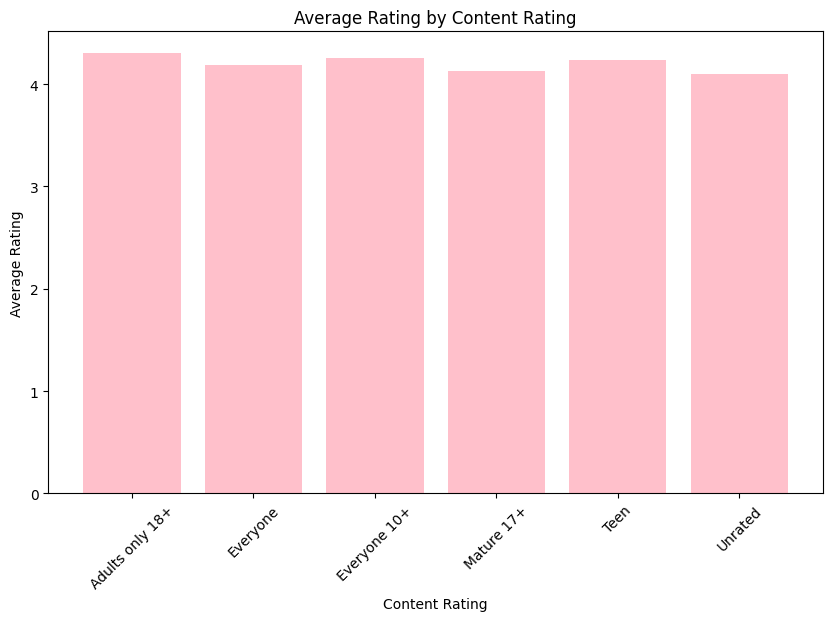

In [ ]:
plt.figure(figsize=(10,6))
plt.bar(content_group.index,content_group['Rating'],color='pink')
plt.title('Average Rating by Content Rating')
plt.xlabel('Content Rating')
plt.xticks(rotation=45)
plt.ylabel('Average Rating')
plt.show()

*Obj 8*:The above plot shows that there is no major difference betwwen content
       rating.All are rated within range 4.0-4.3.

*   The content **Adult only 18+** has more rating with 4.3.




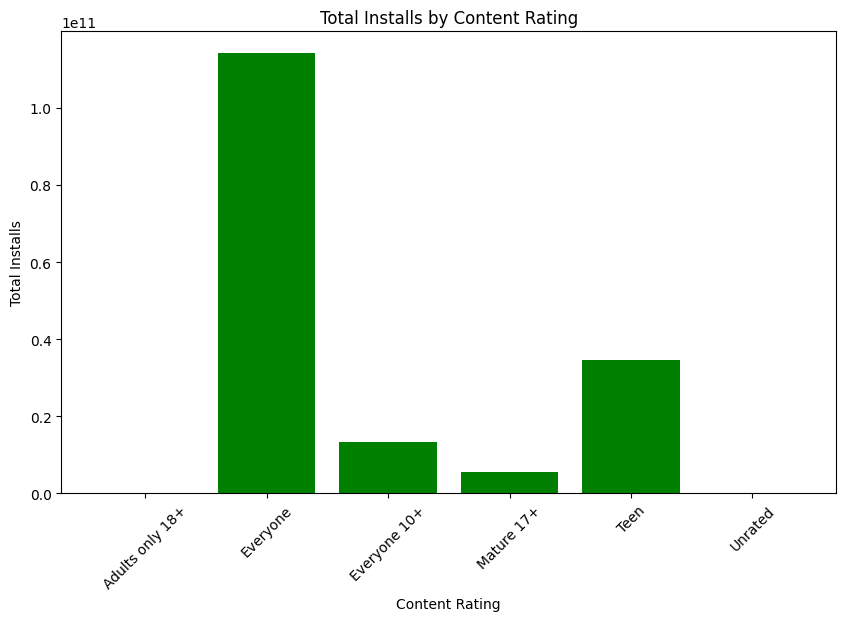

In [ ]:
plt.figure(figsize=(10,6))
plt.bar(content_group.index,content_group['Installs'],color='green')
plt.title('Total Installs by Content Rating')
plt.xlabel('Content Rating')
plt.xticks(rotation=45)
plt.ylabel('Total Installs')
plt.show()

*Obj 9*:

*   The **Everyone** content rating is the highest category which installs **100 billion** application.
*   The **Teen** is the second content rating category after Everyone installs around **40 billion** application.
* **Adults only 18+**  content rating category has installed application in least amount.



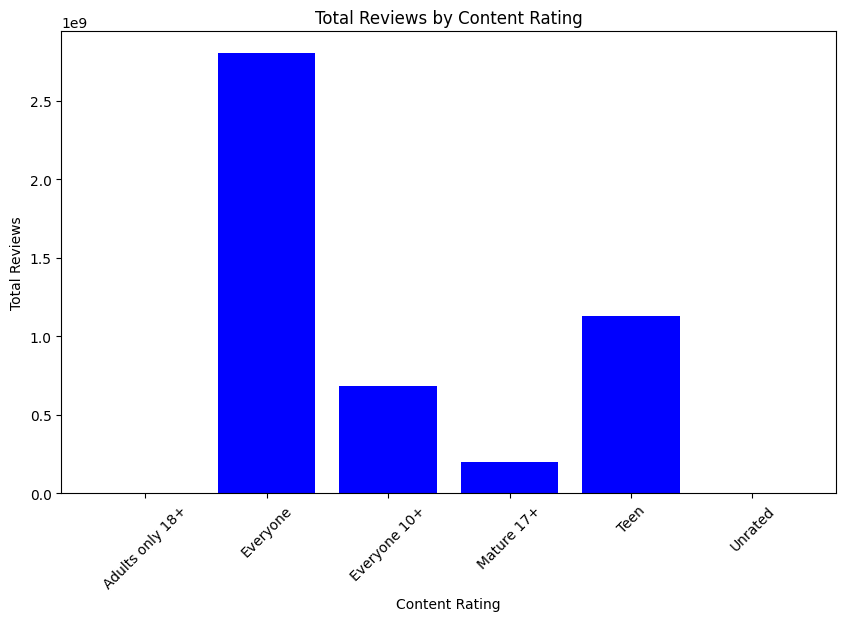

In [ ]:
plt.figure(figsize=(10,6))
plt.bar(content_group.index,content_group['Reviews'],color='blue')
plt.title('Total Reviews by Content Rating')
plt.xlabel('Content Rating')
plt.xticks(rotation=45)
plt.ylabel('Total Reviews')
plt.show()

*Obj 10*:


*   The **Everyone** content rating category has highest reviews **exceeds 2.5 billion.**
*   The **Teen** content rating is second category which have around **1.0 billion** reviews.
* **Adults only 18+** has least reviews.



In [ ]:
#Analysis by Genre

genre_group=df.groupby('Genres').agg({'Rating':'mean','Installs':'sum','Reviews':'sum'}).sort_values(by='Installs',ascending=False)
print(genre_group)

                               Rating     Installs    Reviews
Genres                                                       
Communication                4.158537  32647241530  815461799
Productivity                 4.211396  14176070180  114116717
Social                       4.255598  14069841475  621241091
Tools                        4.046585  11440224500  272837822
Arcade                       4.304348  10727077727  336990398
...                               ...          ...        ...
Card;Brain Games             4.400000       100000        685
Adventure;Brain Games        4.600000       100000       7148
Comics;Creativity            4.800000        50000        516
Books & Reference;Education  4.200000        11000        471
Board;Pretend Play           4.800000          100          4

[115 rows x 3 columns]


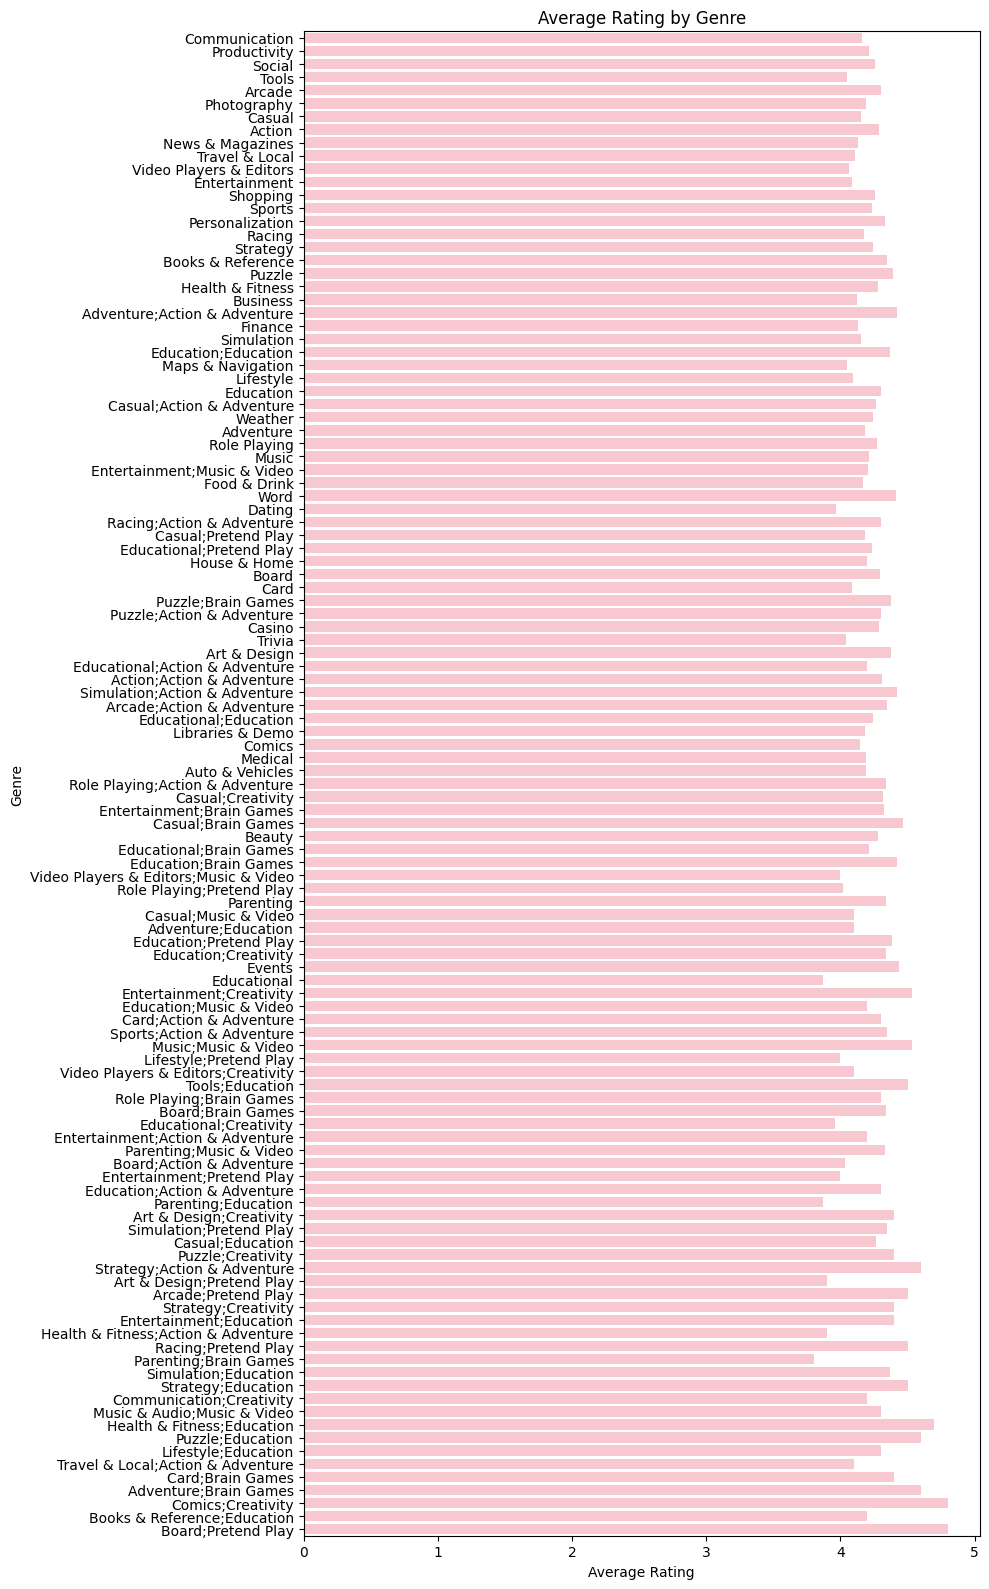

In [ ]:
plt.figure(figsize=(10,16))
sns.barplot(y=genre_group.index,x=genre_group['Rating'],color='pink')
plt.title('Average Rating by Genre')
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

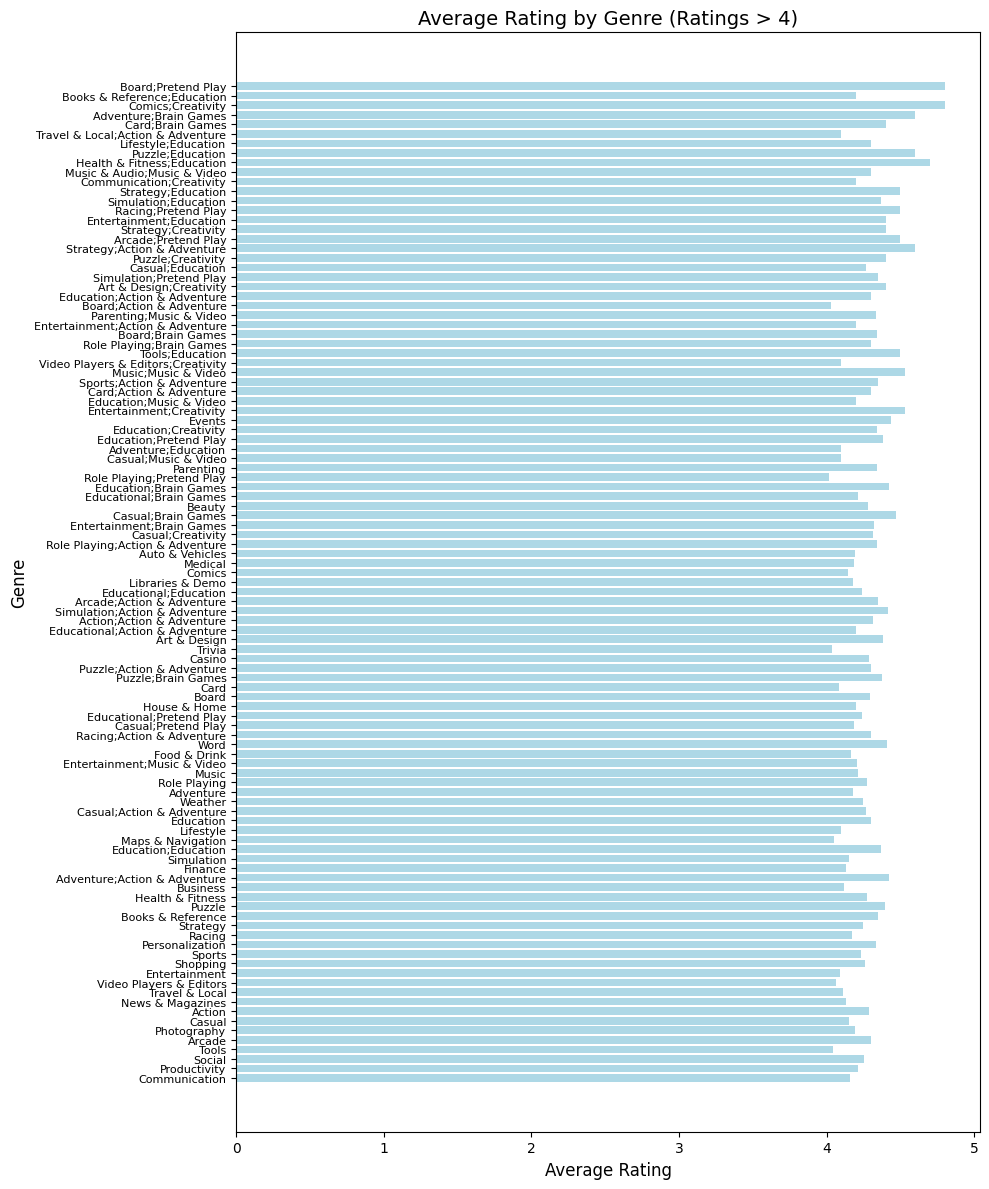

In [ ]:
filter_genre = genre_group[genre_group['Rating'] > 4]

# Create a horizontal bar chart for better readability
plt.figure(figsize=(10,12))
plt.barh(filter_genre.index, filter_genre['Rating'], color='lightblue')  # horizontal bar
plt.title('Average Rating by Genre (Ratings > 4)', fontsize=14)
plt.xlabel('Average Rating', fontsize=12)
plt.ylabel('Genre', fontsize=12)

# Adjust the y-axis label size for readability
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()

*Obj 11*:


*   **Board;Pretend Play,Comics;Creativity** have the highest average ratings,indicates that these applications are popular in user.

*  **Art & Design,Education**,etc.also have good ratings.



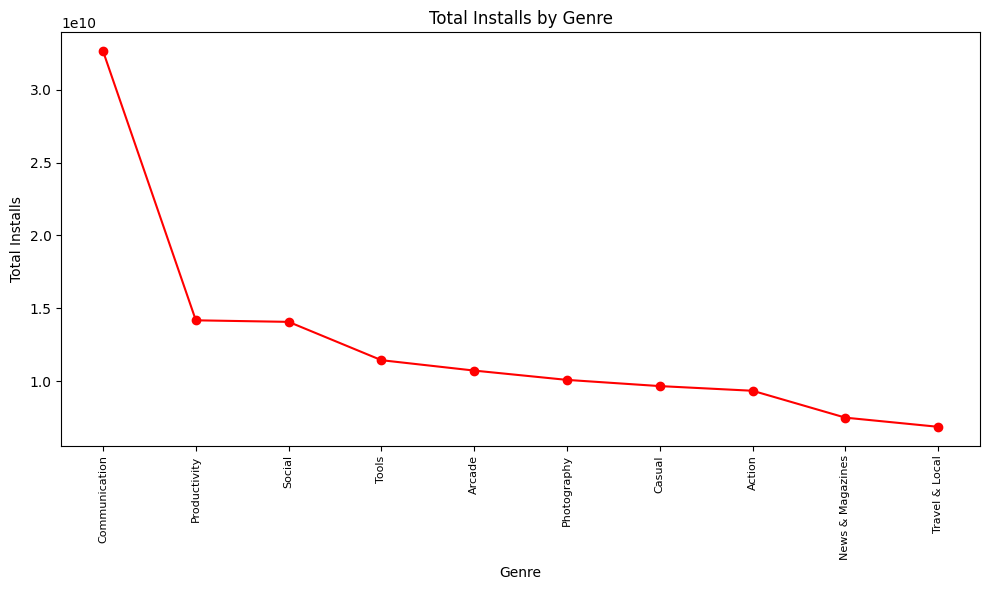

In [ ]:
genre_group_sorted=genre_group.sort_values(by ='Installs',ascending=False)
top_genre=genre_group_sorted.head(10)

plt.figure(figsize=( 10,6))
plt.plot(top_genre.index,top_genre['Installs'],marker='o',color='red')
plt.title('Total Installs by Genre')
plt.xlabel('Genre')
plt.xticks(rotation=90,fontsize=8)
plt.ylabel('Total Installs')
plt.tight_layout()
plt.show()


*Obj 12*:

*   The **Communication** genre has highest number of installation **exceeds 30 billion**.It shows that communication is lifeline for human being .
*   Genres like **Productivity,Social** have moderate number of installation.
* **Travel & Local genre** has lowest number of installation.




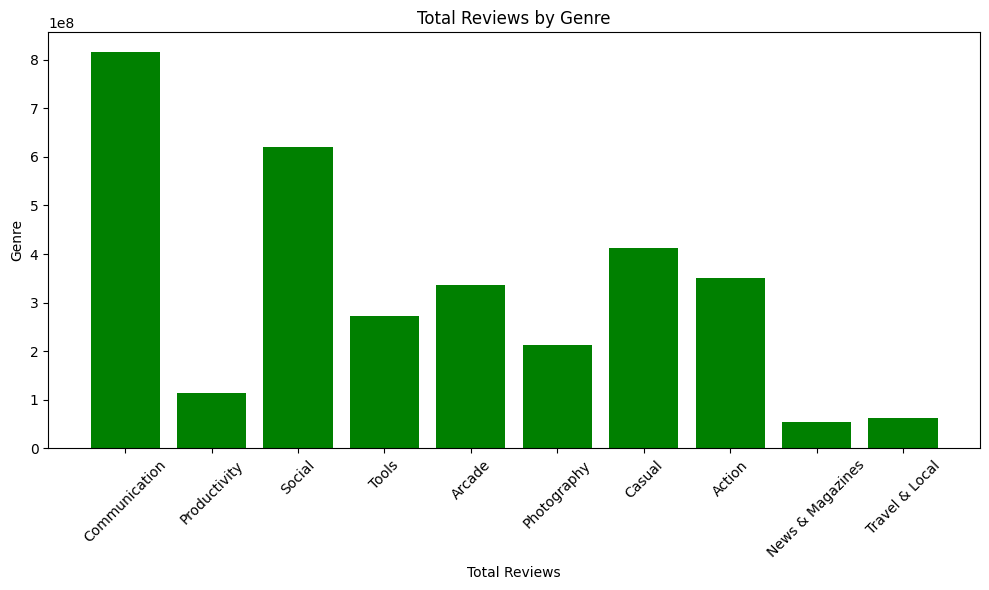

In [ ]:
plt.figure(figsize=(10,6))
plt.bar(top_genre.index,top_genre['Reviews'],color='green')
plt.title('Total Reviews by Genre')
plt.xlabel('Total Reviews')
plt.xticks(rotation=45)
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

*Obj 13*:

*   The **Communication** genre is the highest application **exceeds 8 million** reviews.
*   Genres like **Social,Causal,Action,Arcade** have good reviews within range **4-6 million**.
* **Tools,Photography,Productivity** have moderate reviews between **1-3 million**.
* **News & Magazines** has the lowest reviews **below 1 million**.

